In [ ]:
# https://github.com/tocoteron/joycon-python?tab=readme-ov-file
# pip install joycon-python hidapi pyglm
# https://github.com/DanielOgorchock/joycond # 用于与手柄建立握手联系

# 如何在 Linux 上使用 Nintendo Switch 控制器
# 首先，安装 dkms-hid-nintendo：

# 更新：hid-nintendo 存在于 Linux 的 5.10 内核中！如果您的内核为 5.10 及以上版本，请跳过此步骤。

# git clone https://github.com/nicman23/dkms-hid-nintendo
# cd dkms-hid-nintendo
# sudo dkms add .
# sudo dkms build nintendo -v 3.0
# sudo dkms install nintendo -v 3.0
#  然后，安装 joycond：

# git clone https://github.com/DanielOgorchock/joycond
# cd joycond
# cmake .
# sudo make install
# sudo systemctl enable --now joycond
#  就是这样！

# 现在，当您将 Switch 控制器连接到电脑时，只需按 L+R （SL+SR） 即可根据需要分配它们。

# 或者，您可以在 cemuhook 支持的应用程序上使用 joycond-cemuhook 进行运动输入：

# git clone https://github.com/joaorb64/joycond-cemuhook
# cd joycond-cemuhook
# python3 joycond-cemuhook.py
# 您将找到有关如何在 https://github.com/joaorb64/joycond-cemuhook/wiki 上为 Cemu、Dolphin 和 Citra 配置控制器的指南。

(一)连接测试

In [ ]:
# 连接测试
from joyconrobotics import JoyconRobotics
joycon_gyro, joycon_button, joycon, attitude_estimator = JoyconRobotics("right")

# joycon_id = get_L_id()
# print(f'{joycon_id=}')
# joycon = JoyCon(*joycon_id)

# joycon.get_status()

joycon_id=(1406, 8199, '9c:54:00:e0:7f:16')
正在矫正手柄姿态，请水平放置在桌面上...
手柄初始化完成！


In [ ]:
import time

# 姿态获取
for i in range(20):
    roll, pitch, yaw = attitude_estimator.update(joycon_gyro.gyro_in_rad[0], joycon_gyro.accel_in_g[0])
    print(f'{roll=}, {pitch=}, {yaw=}')
    print()
    time.sleep(0.05)

roll=0.009765678400860399, pitch=-0.00034050480493953846, yaw=2.9526595615510073e-05

roll=0.014818668966583817, pitch=-5.654895435009872e-05, yaw=5.057761533212094e-05

roll=0.017118177736220257, pitch=-2.8323866540804443e-05, yaw=8.857974684486398e-05

roll=0.018721888775505936, pitch=-1.4327329422461443e-05, yaw=0.00011810651961061022

roll=0.019240174054430625, pitch=0.0001064247977682425, yaw=0.00013915749932555486

roll=0.019385649421289407, pitch=5.32790163046703e-05, yaw=0.000177159402257348

roll=0.019004606301017083, pitch=0.0004240668945989419, yaw=0.00020668579786452693

roll=0.019211262410223192, pitch=0.00015510561144709307, yaw=0.00024468838653916977

roll=0.019201149188336236, pitch=0.00024767769005821057, yaw=0.00028269104378809756

roll=0.019082531340608295, pitch=0.0002372022788460417, yaw=0.00032916927693592453

roll=0.019080177536597482, pitch=0.0002889595166179034, yaw=0.0003586956039688185

roll=0.01953263361746489, pitch=-0.0002527726063611356, yaw=0.00038822188

In [ ]:
from joyconrobotics import GyroTrackingJoyCon, get_R_id
import timesw

joycon_id = get_R_id()
joycon = GyroTrackingJoyCon(*joycon_id)
for i in range(20):
    print("joycon pointer:  ", joycon.pointer)
    print("joycon rotation: ", joycon.rotation)
    print("joycon direction:", joycon.direction)
    print()
    time.sleep(0.05)

joycon pointer:   vec2(            0,           -0 )
joycon rotation:  vec3(           -0,            0,           -0 )
joycon direction: vec3(            1,            0,            0 )

joycon pointer:   vec2( -0.000674447,  0.000253627 )
joycon rotation:  vec3(  0.000129608,  0.000253539,  -0.00067448 )
joycon direction: vec3(            1, -0.000674447, -0.000253627 )

joycon pointer:   vec2(  -0.00133807,  0.000491151 )
joycon rotation:  vec3(  0.000253973,  0.000490811,   -0.0013382 )
joycon direction: vec3(     0.999999,  -0.00133807,  -0.00049115 )

joycon pointer:   vec2(  -0.00201247,  0.000723363 )
joycon rotation:  vec3(  0.000378489,  0.000722601,  -0.00201274 )
joycon direction: vec3(     0.999998,  -0.00201246, -0.000723361 )

joycon pointer:   vec2(  -0.00338274,   0.00120424 )
joycon rotation:  vec3(  0.000622646,   0.00120214,  -0.00338348 )
joycon direction: vec3(     0.999994,  -0.00338272,  -0.00120424 )

joycon pointer:   vec2(  -0.00473132,   0.00170163 )
joycon 

In [ ]:
from joyconrobotics import ButtonEventJoyCon, get_R_id
import time

joycon_id = get_R_id()
joycon = ButtonEventJoyCon(*joycon_id)

while 1:
    for event_type, status in joycon.events():
        print(event_type, status)
    time.sleep(0.1)


In [ ]:
from joyconrobotics import GyroTrackingJoyCon, get_R_id, ButtonEventJoyCon
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# 获取JoyCon ID并初始化GyroTrackingJoyCon
joycon_id = get_R_id()
joycon_gyro = GyroTrackingJoyCon(*joycon_id)
joycon_button = ButtonEventJoyCon(*joycon_id)
# 创建波形图
plt.ion()  # 开启交互模式
fig, ax = plt.subplots(figsize=(10, 5))

# 初始化数据容器
time_data = []
direction_data = [[], [], []]  # 分为三个子数据（假设direction包含三个值）

# 设置显示的时间范围
max_time = 10  # 数据显示的最大时间范围（单位：秒）

for i in range(200):  # 持续获取数据并更新图形
    # 获取数据
    time_data.append(i * 0.05)  # 时间数据
    direction_data[0].append(joycon_gyro.direction[0])  # 方向数据第一个值
    direction_data[1].append(joycon_gyro.direction[1])  # 方向数据第二个值
    direction_data[2].append(joycon_gyro.direction[2])  # 方向数据第三个值
    
    # 限制显示的数据长度
    if len(time_data) > max_time / 0.05:
        time_data = time_data[-int(max_time / 0.05):]
        direction_data[0] = direction_data[0][-int(max_time / 0.05):]
        direction_data[1] = direction_data[1][-int(max_time / 0.05):]
        direction_data[2] = direction_data[2][-int(max_time / 0.05):]
    
    # 清除上一帧内容
    clear_output(wait=True)

    # 绘制波形图
    ax.clear()
    ax.plot(time_data, direction_data[0], label='Roll (X)', color='r')  # Roll (X轴)，红色
    ax.plot(time_data, direction_data[1], label='Yaw (Y)', color='g')  # Pitch (Y轴)，绿色
    ax.plot(time_data, direction_data[2], label='Pitch (Z)', color='b')  # Yaw (Z轴)，蓝色

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Value')
    ax.set_title('JoyCon Gyro Data')
    ax.legend(loc='upper right')
    
    # 显示图形
    display(fig)
    
    for event_type, status in joycon_button.events():
        if event_type == 'home' and status==1:
            joycon_gyro.calibrate()
            joycon_gyro.reset_orientation
            # print(event_type, status)
    
    # 暂停一段时间，模拟实时数据获取
    time.sleep(0.05)

plt.ioff()  # 关闭交互模式


KeyboardInterrupt: 

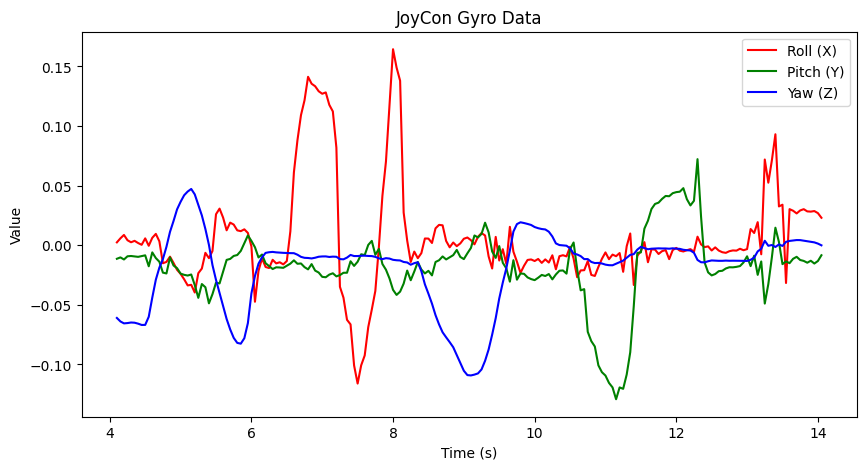

In [8]:
from pyjoycon import GyroTrackingJoyCon, get_R_id, ButtonEventJoyCon, JoyCon
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from glm import vec2, vec3, quat, angleAxis, eulerAngles

import math

class LowPassFilter:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.prev_value = 0.0

    def update(self, new_value):
        # 应用低通滤波公式：output = alpha * new_value + (1 - alpha) * prev_value
        self.prev_value = self.alpha * new_value + (1 - self.alpha) * self.prev_value
        return self.prev_value
    
class AttitudeEstimator:
    def __init__(self):

        # 初始化角度（单位：弧度）
        self.pitch = 0.0  # 倾斜角（俯仰角）
        self.roll = 0.0   # 滚转角
        self.yaw = 0.0    # 偏航角
        self.dt = 0.05    # 时间步长（秒），可以根据采样频率调整
        self.alpha = 0.90 # 滤波器常数（一般取0.98，0.98是加速度计主导，0.02是陀螺仪主导）
        
        self.direction_X = vec3(1, 0, 0)
        self.direction_Y = vec3(0, 1, 0)
        self.direction_Z = vec3(0, 0, 1)
        self.direction_Q = quat()
        
        # 低通滤波器
        self.lpf_roll = LowPassFilter(alpha=0.9)    # 低通滤波器用于滚转角（最终输出）
        self.lpf_pitch = LowPassFilter(alpha=0.9)   # 低通滤波器用于俯仰角（最终输出）
    
    def reset_yaw(self):
        self.direction_X = vec3(1, 0, 0)
        self.direction_Y = vec3(0, 1, 0)
        self.direction_Z = vec3(0, 0, 1)
        self.direction_Q = quat()
    
    def update(self,gyro_in_rad,accel_in_g):
        # 实时计算 pitch roll
        self.pitch = 0.0  # 倾斜角（俯仰角）
        self.roll = 0.0   # 滚转角
        
        ax, ay, az = accel_in_g
        gx, gy, gz = gyro_in_rad

        # 计算加速度计提供的俯仰角和滚转角
        roll_acc = math.atan2(ay, -az)
        pitch_acc = math.atan2(-ax, math.sqrt(ay**2 + az**2))
        
        # 利用陀螺仪数据更新角度
        self.pitch += gy * self.dt
        self.roll -= gx * self.dt

        # 互补滤波器：加权融合加速度计和陀螺仪的数据
        self.pitch = self.alpha * self.pitch + (1 - self.alpha) * pitch_acc
        self.roll = self.alpha * self.roll + (1 - self.alpha) * roll_acc
        
        # 最终输出的滚转角和俯仰角再进行低通滤波
        self.pitch = self.lpf_pitch.update(self.pitch)
        self.roll = self.lpf_roll.update(self.roll)
        
        # 偏航角（通过陀螺仪更新，假设偏航角变化较慢）
        # threshold = 0.005  # 设定一个较小的阈值
        # if abs(gz) > threshold:
        #         self.yaw += gz * self.dt   
                
        rotation = angleAxis(gx * (-1/86), self.direction_X) \
            * angleAxis(gy * (-1/86), self.direction_Y) \
            * angleAxis(gz * (-1/86), self.direction_Z)

        self.direction_X *= rotation
        self.direction_Y *= rotation
        self.direction_Z *= rotation
        self.direction_Q *= rotation        
        
        self.yaw = self.direction_X[1]           
                
        
        return self.roll, self.pitch, self.yaw

# 获取JoyCon ID并初始化GyroTrackingJoyCon
joycon_id = get_R_id()
joycon_gyro = GyroTrackingJoyCon(*joycon_id)
joycon_button = ButtonEventJoyCon(*joycon_id)

# 矫正和初始化
joycon_gyro.calibrate()
joycon_gyro.reset_orientation
time.sleep(2)

# 创建波形图
plt.ion()  # 开启交互模式
fig, ax = plt.subplots(figsize=(10, 5))

# 初始化数据容器
time_data = []
direction_data = [[], [], []]  # 分为三个子数据（假设direction包含三个值）

# 设置显示的时间范围
max_time = 10  # 数据显示的最大时间范围（单位：秒）
attitude_estimator = AttitudeEstimator()

for i in range(1000):  # 持续获取数据并更新图形
    # 获取数据
    time_data.append(i * 0.05)  # 时间数据
    
    attitude_estimator_value = attitude_estimator.update(joycon_gyro.gyro_in_rad[0], joycon_gyro.accel_in_g[0])
    
    direction_data[0].append(attitude_estimator_value[0])  # 方向数据第一个值
    # direction_data[0].append(joycon_gyro.direction[1]/20)  # 方向数据第一个值
    direction_data[1].append(attitude_estimator_value[1])  # 方向数据第二个值
    # direction_data[2].append(joycon_gyro.direction[1])  # 方向数据第三个值
    direction_data[2].append(attitude_estimator_value[2])  # 方向数据第三个值
    
    
    # 限制显示的数据长度
    if len(time_data) > max_time / 0.05:
        time_data = time_data[-int(max_time / 0.05):]
        direction_data[0] = direction_data[0][-int(max_time / 0.05):]
        direction_data[1] = direction_data[1][-int(max_time / 0.05):]
        direction_data[2] = direction_data[2][-int(max_time / 0.05):]
    
    # 清除上一帧内容
    clear_output(wait=True)

    # 绘制波形图
    ax.clear()
    ax.plot(time_data, direction_data[0], label='Roll (X)', color='r')  # Roll (X轴)，红色 [-0.6, +0.6] ，正面朝上的时候是 +0.6，- 0.6交叉
    ax.plot(time_data, direction_data[1], label='Pitch (Y)', color='g')  # Pitch (Y轴)，绿色
    ax.plot(time_data, direction_data[2], label='Yaw (Z)', color='b')  # Yaw (Z轴)，蓝色 并不会累计
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Value')
    ax.set_title('JoyCon Gyro Data')
    ax.legend(loc='upper right')
    
    # 显示图形
    display(fig)
    
    for event_type, status in joycon_button.events():
        if event_type == 'home' and status==1:
            joycon_gyro.calibrate()
            joycon_gyro.reset_orientation
            attitude_estimator.reset_yaw()
            # print(event_type, status)
    
    # 暂停一段时间，模拟实时数据获取
    time.sleep(0.01)


plt.ioff()  # 关闭交互模式

KeyboardInterrupt: 

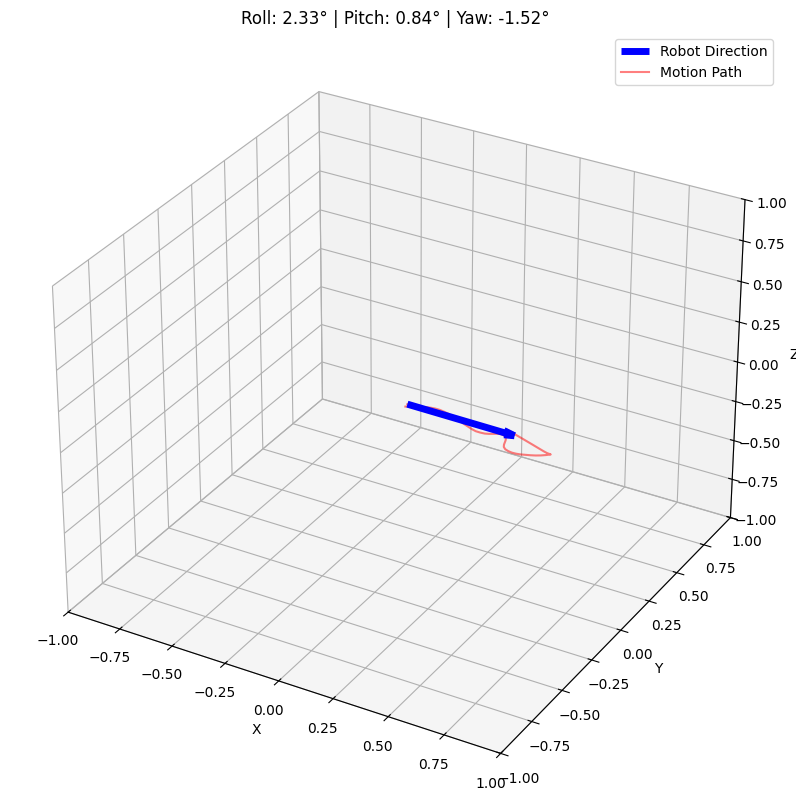

In [3]:
import math
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from glm import vec2, vec3, quat, angleAxis, eulerAngles
from pyjoycon import GyroTrackingJoyCon, get_R_id, ButtonEventJoyCon, JoyCon

class LowPassFilter:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.prev_value = 0.0

    def update(self, new_value):
        self.prev_value = self.alpha * new_value + (1 - self.alpha) * self.prev_value
        return self.prev_value
    
class AttitudeEstimator:
    def __init__(self):
        self.pitch = 0.0  # 倾斜角（俯仰角）
        self.roll = 0.0   # 滚转角
        self.yaw = 0.0    # 偏航角
        self.dt = 0.05    # 时间步长（秒），可以根据采样频率调整
        self.alpha = 0.90 # 滤波器常数
        
        self.direction_X = vec3(1, 0, 0)
        self.direction_Y = vec3(0, 1, 0)
        self.direction_Z = vec3(0, 0, 1)
        self.direction_Q = quat()
        
        self.lpf_roll = LowPassFilter(alpha=0.9)    # 滤波器用于滚转角
        self.lpf_pitch = LowPassFilter(alpha=0.9)   # 滤波器用于俯仰角
    
    def reset_yaw(self):
        self.direction_X = vec3(1, 0, 0)
        self.direction_Y = vec3(0, 1, 0)
        self.direction_Z = vec3(0, 0, 1)
        self.direction_Q = quat()
    
    def update(self, gyro_in_rad, accel_in_g):
        self.pitch = 0.0  # 倾斜角（俯仰角）
        self.roll = 0.0   # 滚转角
        
        ax, ay, az = accel_in_g
        gx, gy, gz = gyro_in_rad

        # 计算加速度计提供的俯仰角和滚转角
        roll_acc = math.atan2(ay, -az)
        pitch_acc = math.atan2(-ax, math.sqrt(ay**2 + az**2))
        
        # 利用陀螺仪数据更新角度
        self.pitch += gy * self.dt
        self.roll -= gx * self.dt

        # 互补滤波器：加权融合加速度计和陀螺仪的数据
        self.pitch = self.alpha * self.pitch + (1 - self.alpha) * pitch_acc
        self.roll = self.alpha * self.roll + (1 - self.alpha) * roll_acc
        
        # 最终输出的滚转角和俯仰角再进行低通滤波
        self.pitch = self.lpf_pitch.update(self.pitch)
        self.roll = self.lpf_roll.update(self.roll)
        
        # 偏航角（通过陀螺仪更新）
        rotation = angleAxis(gx * (-1/86), self.direction_X) \
            * angleAxis(gy * (-1/86), self.direction_Y) \
            * angleAxis(gz * (-1/86), self.direction_Z)

        self.direction_X *= rotation
        self.direction_Y *= rotation
        self.direction_Z *= rotation
        self.direction_Q *= rotation        
        
        self.yaw = self.direction_X[1]  # 偏航角
        
        # 返回滚转角、俯仰角、偏航角（单位为弧度）
        return self.roll, self.pitch, self.yaw

# 获取JoyCon ID并初始化GyroTrackingJoyCon
joycon_id = get_R_id()
joycon_gyro = GyroTrackingJoyCon(*joycon_id)
joycon_button = ButtonEventJoyCon(*joycon_id)
joycon = JoyCon(*joycon_id)

# 矫正和初始化
joycon_gyro.calibrate()
joycon_gyro.reset_orientation
time.sleep(2)

# 创建波形图
plt.ion()  # 开启交互模式
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 初始化数据容器
time_data = []
direction_data = [[], [], []]  # 分为三个子数据（假设direction包含三个值）
history_x, history_y, history_z = [], [], []  # 用来记录运动历史的坐标

max_time = 10  # 数据显示的最大时间范围（单位：秒）
attitude_estimator = AttitudeEstimator()

x, y, z = 0, 0, 0
arrow_scale = 0.5  # 增大箭头的尺度

for i in range(1000):  # 持续获取数据并更新图形
    time_data.append(i * 0.05)  # 时间数据
    
    attitude_estimator_value = attitude_estimator.update(joycon_gyro.gyro_in_rad[0], joycon_gyro.accel_in_g[0])
    
    direction_data[0].append(attitude_estimator_value[0])  # Roll
    direction_data[1].append(attitude_estimator_value[1])  # Pitch
    direction_data[2].append(attitude_estimator_value[2])  # Yaw
    
    # 限制显示的数据长度
    if len(time_data) > max_time / 0.05:
        time_data = time_data[-int(max_time / 0.05):]
        direction_data[0] = direction_data[0][-int(max_time / 0.05):]
        direction_data[1] = direction_data[1][-int(max_time / 0.05):]
        direction_data[2] = direction_data[2][-int(max_time / 0.05):]
    
    # 清除上一帧内容
    clear_output(wait=True)

    # 获取当前的roll, pitch, yaw（单位为弧度），并转换为角度
    roll, pitch, yaw = direction_data[0][-1], direction_data[1][-1], direction_data[2][-1]
    roll = roll * 10
    pitch = -pitch * 10
    yaw = yaw * 30
    
    roll_deg = math.degrees(roll) # 转换为角度
    pitch_deg = math.degrees(pitch)
    yaw_deg = math.degrees(yaw)

    # 计算朝向的方向向量（可以通过旋转矩阵将roll, pitch, yaw应用于方向向量）
    direction_vector = vec3(
        math.cos(pitch) * math.cos(yaw),
        math.cos(pitch) * math.sin(yaw),
        math.sin(pitch)
    )
    
    # 绘制朝向的方向矢量（粗箭头）
    ax.clear()  # 清除之前的图像
    ax.quiver(x, y, z, direction_vector[0], direction_vector[1], direction_vector[2], length=arrow_scale, color='b', label='Robot Direction', linewidth=5, arrow_length_ratio=0.1)

    # 记录当前位置
    history_x.append(x)
    history_y.append(y)
    history_z.append(z)
    
    # 绘制历史轨迹
    ax.plot(history_x, history_y, history_z, color='r', alpha=0.5, label='Motion Path')

    # 设置轴标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Roll: {roll_deg:.2f}° | Pitch: {pitch_deg:.2f}° | Yaw: {yaw_deg:.2f}°')

    # 设置图形显示范围
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    
    ax.legend(loc='upper right')
    
    # 显示图形
    display(fig)
    
    for event_type, status in joycon_button.events():
        if event_type == 'x' and status == 1:
            joycon_gyro.calibrate()
            joycon_gyro.reset_orientation
            attitude_estimator.reset_yaw()
            
    if joycon.get_button_home() == 1:
        x = x - 0.02 if x > 0.02 else (x + 0.02 if x < -0.02 else x) 
        y = y - 0.02 if y > 0.02 else (y + 0.02 if y < -0.02 else y)
        z = z - 0.02 if z > 0.02 else (z + 0.02 if z < -0.02 else z)
    
    joycon_stick = joycon.get_stick_right_vertical()
    print(f'{joycon_stick=}')
    if joycon_stick > 4000:
    # 向前移动：朝着方向矢量的方向前进 0.1 的速度
        x += 0.02 * direction_vector[0]
        y += 0.02 * direction_vector[1]
        z += 0.02 * direction_vector[2]
    elif joycon_stick < 1000:
        # 向后移动：朝着方向矢量的反方向移动 0.1 的速度
        x -= 0.02 * direction_vector[0]
        y -= 0.02 * direction_vector[1]
        z -= 0.02 * direction_vector[2]
    
    # 暂停一段时间，模拟实时数据获取
    time.sleep(0.01)

plt.ioff()  # 关闭交互模式
